In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import ADASYN

In [15]:
df = pd.read_csv('03_Cleaned_File(Data Preprocessing).csv')

In [16]:
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,101348.88,0.00,1,1,2,1,1,0,0
1,15647311,Hill,608,0,41,112542.58,83807.86,1,1,1,1,0,0,1
2,15619304,Onio,502,0,42,113931.57,159660.80,3,0,8,0,1,0,0
3,15701354,Boni,699,0,39,93826.63,0.00,2,0,1,0,0,0,0
4,15737888,Mitchell,850,0,43,79084.10,125510.82,1,1,2,1,0,0,1


In [17]:
X = df.drop(columns = ['CustomerId', 'Surname', 'Exited'])
y = df['Exited']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [19]:
scaler = StandardScaler()
columns = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [20]:
y_train.value_counts()

Exited
0    5992
1    1505
Name: count, dtype: int64

In [21]:
over_samp = ADASYN(random_state = 42)
X_train, y_train = over_samp.fit_resample(X_train, y_train)

In [22]:
y_train.value_counts()

Exited
1    6118
0    5992
Name: count, dtype: int64

In [23]:
gradient_boost = GradientBoostingClassifier(random_state = 42)

In [24]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    "max_depth": [1, 2, 3],
    "subsample": [0.8, 1.0]
}

In [25]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}
grid_search = GridSearchCV(estimator = gradient_boost,
                           param_grid = param_grid,
                           scoring = scoring,
                           refit = 'recall',           
                           cv = 5,
)

In [26]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.8, 1.0]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [27]:
grid_search.best_params_

{'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'subsample': 1.0}

In [28]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 735, 1233],
       [  47,  485]], dtype=int64)

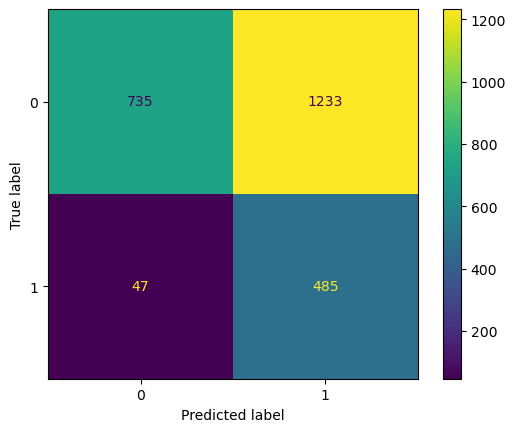

In [30]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [31]:
class0_accuracy = cm[0,0] / cm[0].sum()
class1_accuracy = cm[1,1] / cm[1].sum()
print(f"Class 0 Accuracy: {class0_accuracy:.2f}")
print(f"Class 1 Accuracy: {class1_accuracy:.2f}")

Class 0 Accuracy: 0.37
Class 1 Accuracy: 0.91


In [32]:
print(f'Accuracy : {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision : {precision_score(y_test, y_pred):.2f}')
print(f'Recall : {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score : {f1_score(y_test, y_pred):.2f}')

Accuracy : 0.49
Precision : 0.28
Recall : 0.91
F1 Score : 0.43


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.37      0.53      1968
           1       0.28      0.91      0.43       532

    accuracy                           0.49      2500
   macro avg       0.61      0.64      0.48      2500
weighted avg       0.80      0.49      0.51      2500

